<a href="https://colab.research.google.com/github/farkoo/Cat-Dog-Classifier/blob/master/CatDogClassifier_Part_2_learning_rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prepare train and test data (Data Preprocessing)

In [ ]:
%%bash
git clone "https://github.com/MKasaei00/IUT-CI-HW3-cat-dog-classifier.git"

Cloning into 'IUT-CI-HW3-cat-dog-classifier'...


In [ ]:
%cd IUT-CI-HW3-cat-dog-classifier

/content/IUT-CI-HW3-cat-dog-classifier


In [ ]:
%%bash
7z x dataset/test_set.zip -odataset
7z x dataset/training_set.zip -odataset


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
1 file, 3711630 bytes (3625 KiB)

Extracting archive: dataset/test_set.zip
--
Path = dataset/test_set.zip
Type = zip
Physical Size = 3711630
Embedded Stub Size = 4
Total Physical Size = 45654670
Multivolume = +
Volume Index = 2
Volumes = 3

Everything is Ok

Folders: 3
Files: 2000
Size:       45739128
Compressed: 45654670

7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
1 file, 13986903 bytes (14 MiB)

Extracting archive: dataset/training_set.zip
--
Path = dataset/training_set.zip
Type = zip
Physical Size = 13986903
Embedded Stub Size = 4
Total Physical Size = 181759063
Multivolum

In [ ]:
import numpy as np
import os
import cv2
from google.colab.patches import cv2_imshow
from keras.utils import np_utils
import matplotlib.pyplot as plt
import tensorflow as tf
import random

In [ ]:
test_dir = 'dataset/test_set'
training_dir = 'dataset/training_set'

In [ ]:
def load_data_from_directory(dir,width,height,classes):
  img_data = []
  img_label = []
  categories = os.listdir(dir)
  for category in categories:
    for file in os.listdir(os.path.join(dir,category)):
      img_path = os.path.join(dir,category,file)
      img = cv2.imread(img_path)
      img = cv2.resize(img,(width,height))
      img = np.array(img).astype('float32') / 255
      
      img_data.append(img)
      img_label.append(category)

  img_onehot = np_utils.to_categorical([categories.index(label) for label in img_label],classes,dtype=np.ubyte)
  img_data = np.array(img_data)
  img_onehot = np.array(img_onehot)

  zip_list = list(zip(img_data, img_label, img_onehot))
  random.shuffle(zip_list)
  img_data, img_label, img_onehot = zip(*zip_list)
  return img_data , img_label, img_onehot

In [ ]:
classes = 2
w = 128
h = 128

In [ ]:
train_x , train_label, train_onehot = load_data_from_directory(training_dir,w,h,classes)
test_x , test_label, test_onehot = load_data_from_directory(test_dir,w,h,classes)

In [ ]:
test_label2 = []
for i, label in enumerate(test_label):
     test_label2.append(1) if (label == 'dogs') else test_label2.append(0)

In [ ]:
train_x = np.asarray(train_x)
train_label = np.asarray(train_label)
train_onehot = np.asarray(train_onehot)

test_x = np.asarray(test_x)
test_label = np.asarray(test_label2)
test_onehot = np.asarray(test_onehot)

In [ ]:
!rm -rf cleanData
!mkdir cleanData
np.save('cleanData/train_x.npy',train_x)
np.save('cleanData/train_label.npy',train_label)
np.save('cleanData/train_onehot.npy',train_onehot)

np.save('cleanData/test_x.npy',test_x)
np.save('cleanData/test_label.npy',test_label)
np.save('cleanData/test_onehot.npy',test_onehot)

In [ ]:
train_x = np.load('cleanData/train_x.npy')
train_label = np.load('cleanData/train_onehot.npy')

test_x = np.load('cleanData/test_x.npy')
test_label = np.load('cleanData/test_onehot.npy')
test_vec = np.load('cleanData/test_label.npy')

In [ ]:
from sklearn.model_selection import train_test_split
train_X, valid_X, train_Label, valid_Label = train_test_split(train_x, train_label, test_size = 0.2, random_state = 13)

# Generate basic Neural Network

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten,LeakyReLU
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
from keras.initializers import RandomNormal

# توضیح کلی در مورد عملکرد این تابع

<div dir='rtl'>
از همان تابع ارائه شده در قسمت قبلی استفاده می‌کنیم.
در نهایت پس از یادگیری مدل و داده‌های  تست را با مدل نهایی ارزیابی می‌کنیم و گزارش عملگرد آن را چاپ می‌کنیم.

</div>

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def train_model(config):
  model = Sequential()

  model.add(Flatten(input_shape=(h,w,3)))
  model.add(Dropout(config['in_drop_out']))

  for act ,drop_out, layers in config['layers']:
    for layer in layers:
      model.add(Dense(layer))
      model.add(act())
      model.add(Dropout(drop_out))

  model.compile(
    optimizer=Adam(config['learning_rate']),
    loss=categorical_crossentropy,
    metrics=['accuracy']
  )

  train_datagen = ImageDataGenerator(
        rotation_range=config['aug_rotation'],
        width_shift_range=config['aug_shift_w'],
        height_shift_range=config['aug_shift_h'],
        shear_range=config['aug_shear'],
        zoom_range=config['aug_zoom'],
        horizontal_flip=config['aug_horizontal_flip'],
        fill_mode='nearest'
  )

  train_generator = train_datagen.flow(train_X, train_Label, batch_size = config['batch'])

  validation_datagen = ImageDataGenerator()
  validation_generator = validation_datagen.flow(valid_X,valid_Label,batch_size=256)

  history = model.fit(train_generator,
                      validation_data=validation_generator,
                      epochs = config['epochs'],
                    )
  
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train','validation'],loc='lower right')
  plt.show()

  test_eval = model.evaluate(test_x, test_label, verbose = 0)
  print('Test loss: ', test_eval[0])
  print('Test accuracy: ', test_eval[1])
  print('\n\n')
  
  predictes_classes = model.predict(test_x)
  predicted_classes = np.argmax(np.round(predictes_classes), axis = 1)

  from sklearn.metrics import classification_report
  target_names = ["Class {}".format(i) for i in range(classes)]
  print(classification_report(test_vec, predicted_classes, target_names = target_names))

  return model

 # بررسی نرخ یادگیری

<div dir='rtl'>
در این بخش از همان ابرپارامترهای مطرح شده در قسمت الف استفاده می‌کنیم و فقط مقدار نرخ یادگیری را در حالت‌های مختلف به صورت زیر قرار می‌دهیم و بررسی می‌کنیم.

+ 0.00001
+ 0.0001
+ 0.001
+ 0.005
+ 0.01
+ 0.1
+ 1

In [ ]:
base_config = {
    'in_drop_out':0,
    'layers' : [
          (lambda : Activation('relu'),0.03,[2000,1600,800,600,500]+[400]*3+[400]*5+[300,250,200,150,120]), 
          (lambda : Activation('softmax'),0,[2])
    ],
    'learning_rate':3e-4,
    'batch':256,
    'epochs':100,
    'aug_rotation':10,
    'aug_shift_w':0.04,
    'aug_shift_h':0.04,
    'aug_shear':0.04,
    'aug_zoom':0.04,
    'aug_horizontal_flip':True
}

Epoch 1/100
25/25 [==============================] - 20s 756ms/step - loss: 0.6931 - accuracy: 0.5062 - val_loss: 0.6931 - val_accuracy: 0.4875
Epoch 2/100
25/25 [==============================] - 19s 744ms/step - loss: 0.6930 - accuracy: 0.5020 - val_loss: 0.6930 - val_accuracy: 0.4875
Epoch 3/100
25/25 [==============================] - 18s 734ms/step - loss: 0.6930 - accuracy: 0.4977 - val_loss: 0.6923 - val_accuracy: 0.4875
Epoch 4/100
25/25 [==============================] - 18s 732ms/step - loss: 0.6920 - accuracy: 0.5018 - val_loss: 0.6904 - val_accuracy: 0.5612
Epoch 5/100
25/25 [==============================] - 18s 731ms/step - loss: 0.6891 - accuracy: 0.5290 - val_loss: 0.6844 - val_accuracy: 0.5700
Epoch 6/100
25/25 [==============================] - 19s 739ms/step - loss: 0.6828 - accuracy: 0.5473 - val_loss: 0.6820 - val_accuracy: 0.5650
Epoch 7/100
25/25 [==============================] - 18s 735ms/step - loss: 0.6762 - accuracy: 0.5714 - val_loss: 0.6801 - val_accuracy:

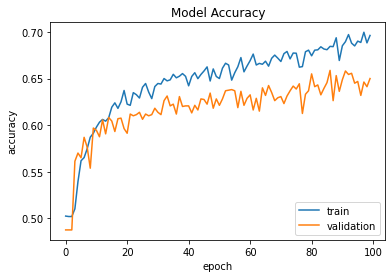

Test loss:  0.6070353388786316
Test accuracy:  0.6784999966621399



              precision    recall  f1-score   support

     Class 0       0.66      0.74      0.70      1000
     Class 1       0.70      0.62      0.66      1000

    accuracy                           0.68      2000
   macro avg       0.68      0.68      0.68      2000
weighted avg       0.68      0.68      0.68      2000



In [ ]:
config = dict(base_config)
config['learning_rate'] = 0.00001
model = train_model(config)

Epoch 1/100
25/25 [==============================] - 20s 752ms/step - loss: 0.6936 - accuracy: 0.4956 - val_loss: 0.6928 - val_accuracy: 0.5125
Epoch 2/100
25/25 [==============================] - 19s 743ms/step - loss: 0.6934 - accuracy: 0.5004 - val_loss: 0.6929 - val_accuracy: 0.5119
Epoch 3/100
25/25 [==============================] - 19s 745ms/step - loss: 0.6934 - accuracy: 0.5073 - val_loss: 0.6929 - val_accuracy: 0.5144
Epoch 4/100
25/25 [==============================] - 19s 739ms/step - loss: 0.6935 - accuracy: 0.5005 - val_loss: 0.6928 - val_accuracy: 0.5163
Epoch 5/100
25/25 [==============================] - 19s 739ms/step - loss: 0.6929 - accuracy: 0.5024 - val_loss: 0.6934 - val_accuracy: 0.4875
Epoch 6/100
25/25 [==============================] - 19s 740ms/step - loss: 0.6931 - accuracy: 0.5002 - val_loss: 0.6928 - val_accuracy: 0.5288
Epoch 7/100
25/25 [==============================] - 19s 744ms/step - loss: 0.6922 - accuracy: 0.5146 - val_loss: 0.6940 - val_accuracy:

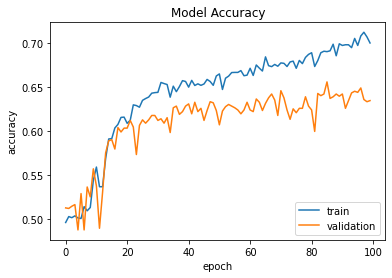

Test loss:  0.6385759711265564
Test accuracy:  0.6439999938011169



              precision    recall  f1-score   support

     Class 0       0.66      0.60      0.63      1000
     Class 1       0.63      0.69      0.66      1000

    accuracy                           0.64      2000
   macro avg       0.65      0.64      0.64      2000
weighted avg       0.65      0.64      0.64      2000



In [ ]:
config = dict(base_config)
config['learning_rate'] = 0.0001
model = train_model(config)

Epoch 1/100
25/25 [==============================] - 28s 984ms/step - loss: 0.7042 - accuracy: 0.4951 - val_loss: 0.6937 - val_accuracy: 0.4981
Epoch 2/100
25/25 [==============================] - 25s 988ms/step - loss: 0.6941 - accuracy: 0.4887 - val_loss: 0.6933 - val_accuracy: 0.4981
Epoch 3/100
25/25 [==============================] - 25s 1000ms/step - loss: 0.6933 - accuracy: 0.5023 - val_loss: 0.6932 - val_accuracy: 0.4981
Epoch 4/100
25/25 [==============================] - 25s 981ms/step - loss: 0.6932 - accuracy: 0.5012 - val_loss: 0.6931 - val_accuracy: 0.5050
Epoch 5/100
25/25 [==============================] - 25s 986ms/step - loss: 0.6934 - accuracy: 0.4985 - val_loss: 0.6933 - val_accuracy: 0.4981
Epoch 6/100
25/25 [==============================] - 25s 984ms/step - loss: 0.6933 - accuracy: 0.4922 - val_loss: 0.6931 - val_accuracy: 0.5019
Epoch 7/100
25/25 [==============================] - 25s 989ms/step - loss: 0.6931 - accuracy: 0.5027 - val_loss: 0.6927 - val_accuracy

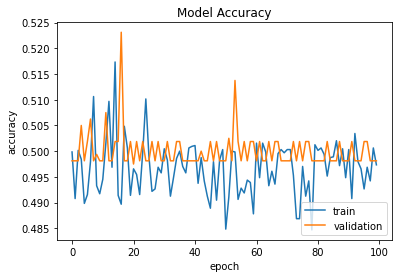

Test loss:  0.6931498646736145
Test accuracy:  0.5



              precision    recall  f1-score   support

     Class 0       0.50      1.00      0.67      1000
     Class 1       0.00      0.00      0.00      1000

    accuracy                           0.50      2000
   macro avg       0.25      0.50      0.33      2000
weighted avg       0.25      0.50      0.33      2000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
config = dict(base_config)
config['learning_rate'] = 0.001
model = train_model(config)

Epoch 1/100
25/25 [==============================] - 27s 1s/step - loss: 6.8271 - accuracy: 0.5035 - val_loss: 8.0288 - val_accuracy: 0.5019
Epoch 2/100
25/25 [==============================] - 25s 986ms/step - loss: 8.1723 - accuracy: 0.4930 - val_loss: 8.0288 - val_accuracy: 0.5019
Epoch 3/100
25/25 [==============================] - 25s 1s/step - loss: 8.0315 - accuracy: 0.5017 - val_loss: 8.0288 - val_accuracy: 0.5019
Epoch 4/100
25/25 [==============================] - 25s 1s/step - loss: 8.0386 - accuracy: 0.5013 - val_loss: 8.0288 - val_accuracy: 0.5019
Epoch 5/100
25/25 [==============================] - 25s 1s/step - loss: 8.1415 - accuracy: 0.4949 - val_loss: 8.0288 - val_accuracy: 0.5019
Epoch 6/100
25/25 [==============================] - 25s 994ms/step - loss: 8.0597 - accuracy: 0.5000 - val_loss: 8.0288 - val_accuracy: 0.5019
Epoch 7/100
25/25 [==============================] - 25s 995ms/step - loss: 8.1142 - accuracy: 0.4966 - val_loss: 8.0288 - val_accuracy: 0.5019
Epoc

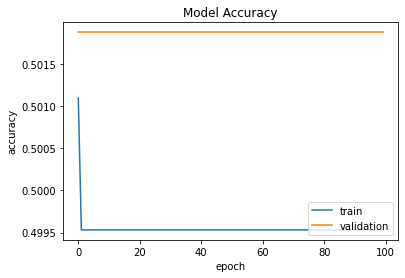

Test loss:  8.059049606323242
Test accuracy:  0.5



              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00      1000
     Class 1       0.50      1.00      0.67      1000

    accuracy                           0.50      2000
   macro avg       0.25      0.50      0.33      2000
weighted avg       0.25      0.50      0.33      2000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
config = dict(base_config)
config['learning_rate'] = 0.005
model = train_model(config)

Epoch 1/100
25/25 [==============================] - 20s 744ms/step - loss: 7.0031 - accuracy: 0.4983 - val_loss: 7.8576 - val_accuracy: 0.5125
Epoch 2/100
25/25 [==============================] - 18s 732ms/step - loss: 8.0904 - accuracy: 0.4981 - val_loss: 7.8576 - val_accuracy: 0.5125
Epoch 3/100
25/25 [==============================] - 18s 727ms/step - loss: 8.1577 - accuracy: 0.4939 - val_loss: 7.8576 - val_accuracy: 0.5125
Epoch 4/100
25/25 [==============================] - 18s 731ms/step - loss: 8.1438 - accuracy: 0.4947 - val_loss: 7.8576 - val_accuracy: 0.5125
Epoch 5/100
25/25 [==============================] - 18s 739ms/step - loss: 8.1220 - accuracy: 0.4961 - val_loss: 7.8576 - val_accuracy: 0.5125
Epoch 6/100
25/25 [==============================] - 18s 736ms/step - loss: 8.0233 - accuracy: 0.5022 - val_loss: 7.8576 - val_accuracy: 0.5125
Epoch 7/100
25/25 [==============================] - 18s 738ms/step - loss: 8.0074 - accuracy: 0.5032 - val_loss: 7.8576 - val_accuracy:

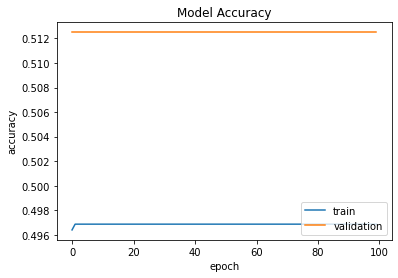

Test loss:  8.059048652648926
Test accuracy:  0.5



              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00      1000
     Class 1       0.50      1.00      0.67      1000

    accuracy                           0.50      2000
   macro avg       0.25      0.50      0.33      2000
weighted avg       0.25      0.50      0.33      2000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
config = dict(base_config)
config['learning_rate'] = 0.01
model = train_model(config)

Epoch 1/100
25/25 [==============================] - 20s 749ms/step - loss: 7.0713 - accuracy: 0.4900 - val_loss: 7.8576 - val_accuracy: 0.5125
Epoch 2/100
25/25 [==============================] - 19s 740ms/step - loss: 8.1842 - accuracy: 0.4922 - val_loss: 7.8576 - val_accuracy: 0.5125
Epoch 3/100
25/25 [==============================] - 18s 739ms/step - loss: 8.0812 - accuracy: 0.4986 - val_loss: 7.8576 - val_accuracy: 0.5125
Epoch 4/100
25/25 [==============================] - 19s 743ms/step - loss: 8.2045 - accuracy: 0.4910 - val_loss: 7.8576 - val_accuracy: 0.5125
Epoch 5/100
25/25 [==============================] - 19s 744ms/step - loss: 8.2142 - accuracy: 0.4904 - val_loss: 7.8576 - val_accuracy: 0.5125
Epoch 6/100
25/25 [==============================] - 19s 742ms/step - loss: 8.2151 - accuracy: 0.4903 - val_loss: 7.8576 - val_accuracy: 0.5125
Epoch 7/100
25/25 [==============================] - 18s 736ms/step - loss: 8.0504 - accuracy: 0.5005 - val_loss: 7.8576 - val_accuracy:

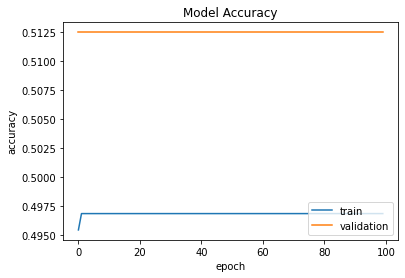

Test loss:  8.059048652648926
Test accuracy:  0.5



              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00      1000
     Class 1       0.50      1.00      0.67      1000

    accuracy                           0.50      2000
   macro avg       0.25      0.50      0.33      2000
weighted avg       0.25      0.50      0.33      2000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
config = dict(base_config)
config['learning_rate'] = 0.1
model = train_model(config)

Epoch 1/100
25/25 [==============================] - 20s 742ms/step - loss: nan - accuracy: 0.5124 - val_loss: nan - val_accuracy: 0.4875
Epoch 2/100
25/25 [==============================] - 18s 733ms/step - loss: nan - accuracy: 0.5095 - val_loss: nan - val_accuracy: 0.4875
Epoch 3/100
25/25 [==============================] - 18s 730ms/step - loss: nan - accuracy: 0.5077 - val_loss: nan - val_accuracy: 0.4875
Epoch 4/100
25/25 [==============================] - 18s 733ms/step - loss: nan - accuracy: 0.5070 - val_loss: nan - val_accuracy: 0.4875
Epoch 5/100
25/25 [==============================] - 18s 737ms/step - loss: nan - accuracy: 0.4997 - val_loss: nan - val_accuracy: 0.4875
Epoch 6/100
25/25 [==============================] - 18s 733ms/step - loss: nan - accuracy: 0.5071 - val_loss: nan - val_accuracy: 0.4875
Epoch 7/100
25/25 [==============================] - 18s 732ms/step - loss: nan - accuracy: 0.5099 - val_loss: nan - val_accuracy: 0.4875
Epoch 8/100
25/25 [===============

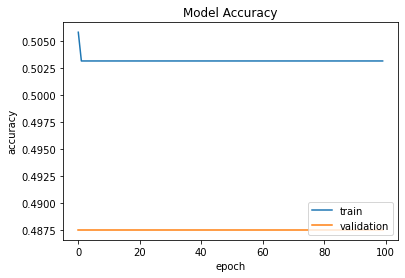

Test loss:  nan
Test accuracy:  0.5



              precision    recall  f1-score   support

     Class 0       0.50      1.00      0.67      1000
     Class 1       0.00      0.00      0.00      1000

    accuracy                           0.50      2000
   macro avg       0.25      0.50      0.33      2000
weighted avg       0.25      0.50      0.33      2000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
config = dict(base_config)
config['learning_rate'] = 1
model = train_model(config)

## تحلیل تست نرخ یادگیری

<div dir='rtl'>
با توجه به بررسی‌های فوق اگر نرخ یادگیری خیلی کم باشد با این‌که یادگیری شبکه به درستی اتفاق می‌افتد و در نهایت در صورتی که تعداد 
epoch 
کافی ادامه پیدا کند در نهایت شبکه به دقت کافی می‌رسد ولی زمان بسیاری صرف یادگیری شبکه می‌شود ولی اگر نرخ یادگیری مناسب انتخاب شود علاوه بر یادگیری صحیح سرعت یادگیری و هم‌گرایی نیز افزایش یافته و درنهایت با تعداد
epoch
کم‌تری مدل با دقت مناسبی به دست می‌اید.

اما در بررسی‌های ذکر شده در صورتی که نرخ یادگیری بیش‌از اندازه بزرگ شود یادگیری شبکه به درستی صورت نمی‌گیرد و وزن‌های شبکه به صورت پیوسته تغییرات ناگهانی خواهند داشت و الگوریتم به یک نقطه‌ی مشخص همگرا نخواهد بود.

با توجه به مدل ارائه شده و داده‌های آموزشی و آگمنتیشن انجام شده روی داده‌ها نرخ یادگیری مناسب باید در حدود 0.0001 باشد و کم‌تر از این مقدار با اینکه درست است ولی باعث طولانی شدن آموزش می‌شود ولی اگر نرخ یادگیری بیش‌تر از این مقدار باشد شاهد نوسان شبکه و عدم یادگیری خواهیم بود.